# Key Graph Algorithms
- [Graph Analytics Course, Coursera/UCSD](https://www.coursera.org/learn/big-data-graph-analytics)
- [Networkx docs](https://networkx.org/)
- [Inspiration (Rahul Agarwal, Medium)](https://towardsdatascience.com/data-scientists-the-five-graph-algorithms-that-you-should-know-30f454fa5513)

## Connected Components

In [1]:
import networkx as nx

In [2]:
# list of edges with weights = distances between cities
edgelist = [['Mannheim', 'Frankfurt', 85], 
            ['Mannheim', 'Karlsruhe', 80], 
            ['Erfurt', 'Wurzburg', 186], 
            ['Munchen', 'Numberg', 167], 
            ['Munchen', 'Augsburg', 84], 
            ['Munchen', 'Kassel', 502], 
            ['Numberg', 'Stuttgart', 183], 
            ['Numberg', 'Wurzburg', 103], 
            ['Numberg', 'Munchen', 167], 
            ['Stuttgart', 'Numberg', 183], 
            ['Augsburg', 'Munchen', 84], 
            ['Augsburg', 'Karlsruhe', 250], 
            ['Kassel', 'Munchen', 502], 
            ['Kassel', 'Frankfurt', 173], 
            ['Frankfurt', 'Mannheim', 85], 
            ['Frankfurt', 'Wurzburg', 217], 
            ['Frankfurt', 'Kassel', 173], 
            ['Wurzburg', 'Numberg', 103], 
            ['Wurzburg', 'Erfurt', 186], 
            ['Wurzburg', 'Frankfurt', 217], 
            ['Karlsruhe', 'Mannheim', 80], 
            ['Karlsruhe', 'Augsburg', 250],
            ["Mumbai", "Delhi",400],
            ["Delhi", "Kolkata",500],
            ["Kolkata", "Bangalore",600],
            ["TX", "NY",1200],
            ["ALB", "NY",800]]

In [3]:
# create a list of edges, plus distances(weights)

g = nx.Graph()  
for edge in edgelist:  
    g.add_edge(edge[0],edge[1], weight = edge[2])

In [4]:
# find continents & cities from the graph

for i, x in enumerate(nx.connected_components(g)):  
    print("cc"+str(i)+":",x)  

cc0: {'Kassel', 'Erfurt', 'Numberg', 'Wurzburg', 'Frankfurt', 'Stuttgart', 'Mannheim', 'Karlsruhe', 'Munchen', 'Augsburg'}
cc1: {'Bangalore', 'Kolkata', 'Mumbai', 'Delhi'}
cc2: {'NY', 'ALB', 'TX'}


## Shortest Path (Dijkstra)

In [5]:
print(nx.shortest_path(g,
                       'Stuttgart',
                       'Frankfurt',
                       weight='weight'))

print(nx.shortest_path_length(g,
                              'Stuttgart',
                              'Frankfurt',
                              weight='weight'))

['Stuttgart', 'Numberg', 'Wurzburg', 'Frankfurt']
503


## Shortest Path between all pairs

In [6]:
for x in nx.all_pairs_dijkstra_path(g,weight='weight'):
    print(x)

('Mannheim', {'Mannheim': ['Mannheim'], 'Frankfurt': ['Mannheim', 'Frankfurt'], 'Karlsruhe': ['Mannheim', 'Karlsruhe'], 'Augsburg': ['Mannheim', 'Karlsruhe', 'Augsburg'], 'Kassel': ['Mannheim', 'Frankfurt', 'Kassel'], 'Wurzburg': ['Mannheim', 'Frankfurt', 'Wurzburg'], 'Munchen': ['Mannheim', 'Karlsruhe', 'Augsburg', 'Munchen'], 'Erfurt': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']})
('Frankfurt', {'Frankfurt': ['Frankfurt'], 'Mannheim': ['Frankfurt', 'Mannheim'], 'Kassel': ['Frankfurt', 'Kassel'], 'Wurzburg': ['Frankfurt', 'Wurzburg'], 'Karlsruhe': ['Frankfurt', 'Mannheim', 'Karlsruhe'], 'Augsburg': ['Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'], 'Munchen': ['Frankfurt', 'Wurzburg', 'Numberg', 'Munchen'], 'Erfurt': ['Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Frankfurt', 'Wurzburg', 'Numb

## Minimum Spanning Tree
- How to connect all nodes in a graph using the minimum amount of connections

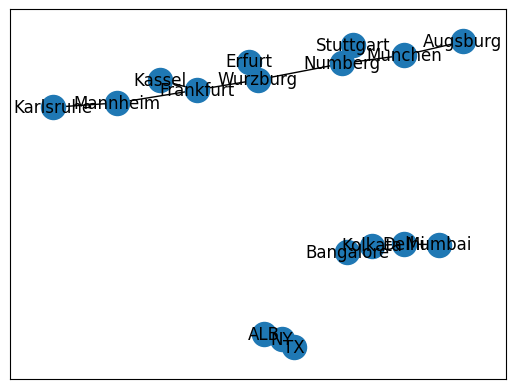

In [7]:
nx.draw_networkx(nx.minimum_spanning_tree(g))

## Pagerank

In [8]:
# dataset (downloaded from Kaggle)
! ls *.txt

facebook-combined.txt


In [9]:
fb = nx.read_edgelist('facebook-combined.txt', 
                      create_using = nx.Graph(), 
                      nodetype=int)

In [10]:
pos = nx.spring_layout(fb)

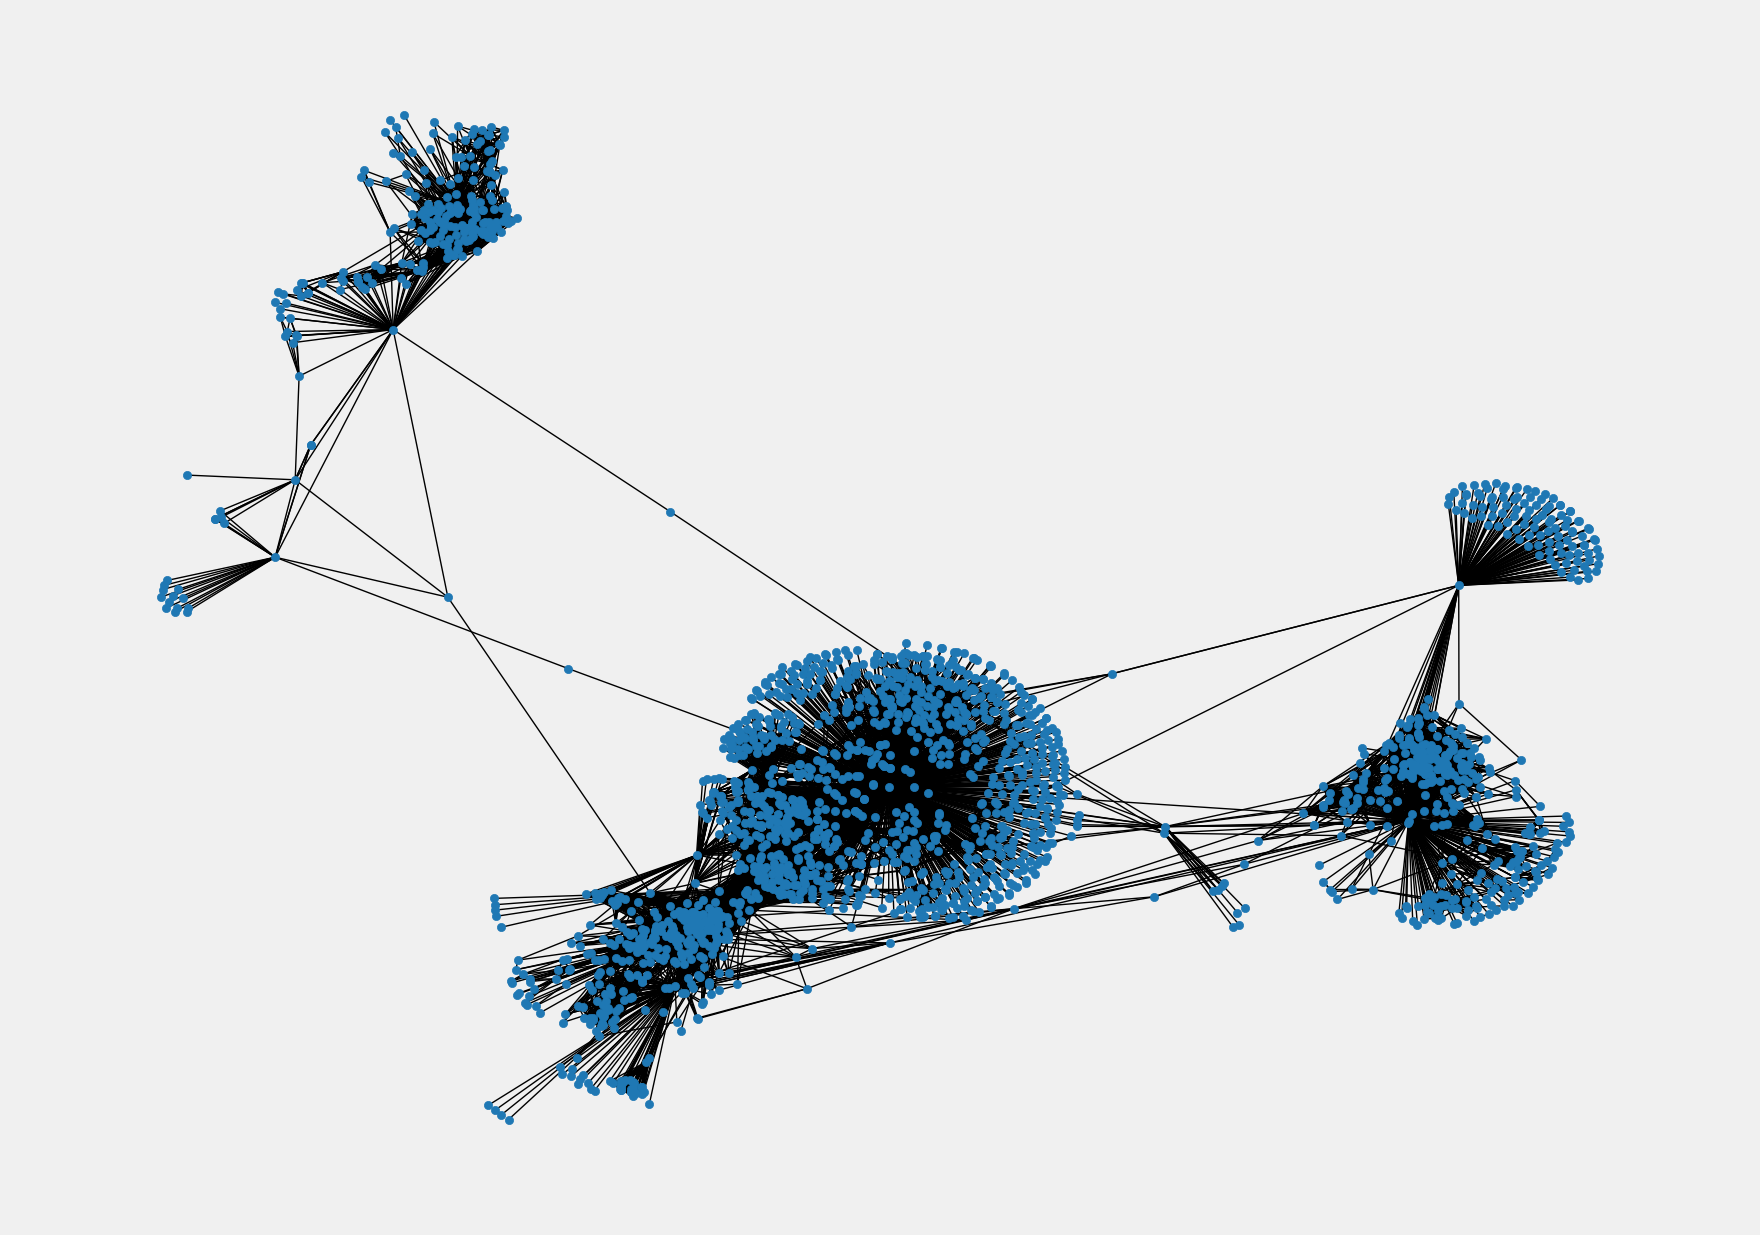

In [11]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(20,15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels=False, node_size=35)

In [12]:
# find user influencers
pageranks = nx.pagerank(fb)
print(pageranks)

{0: 0.013301055394356, 1: 0.000500575592646764, 2: 0.000401129962022709, 3: 0.00048584088835406985, 4: 0.0004707868735712305, 5: 0.00045363117744683725, 6: 0.00035288224242889917, 7: 0.0007270602087837882, 8: 0.0004641801387383704, 9: 0.0013455123687520479, 10: 0.00029746025883181903, 11: 0.00010539525009094076, 12: 0.00010539525009094076, 13: 0.0007317023849228891, 14: 0.0005690442933545158, 15: 0.00010539525009094076, 16: 0.00028281003487782566, 17: 0.000512538675106729, 18: 0.00010539525009094076, 19: 0.0007495700795445599, 20: 0.0005779135265484436, 21: 0.00164124344390702, 22: 0.0003816099769167274, 23: 0.0008040885449204165, 24: 0.00047074140383963854, 25: 0.0017609841097481497, 26: 0.001549171926871873, 27: 0.0002111529777222283, 28: 0.0005034352033264586, 29: 0.0004131882111346673, 30: 0.0004645020594608749, 31: 0.0006667459944520979, 32: 0.00029294440786795887, 33: 0.00018329584711757524, 34: 0.00020829303269724147, 35: 0.00014630496314058398, 36: 0.00037843321376546633, 37: 0

In [13]:
import operator
sorted_pagerank = sorted(pageranks.items(), 
                         key=operator.itemgetter(1),
                         reverse = True)
print(sorted_pagerank)

[(107, 0.08694155704790192), (136, 0.018615567369891065), (0, 0.013301055394356), (916, 0.011501733540147635), (483, 0.008855686300043257), (896, 0.008436371790534756), (917, 0.00832197577124115), (921, 0.00783388136379529), (348, 0.00593384786490443), (906, 0.005543399555082577), (897, 0.004997747349531026), (925, 0.004719577018239819), (414, 0.004473805403360594), (637, 0.004410460590032374), (686, 0.004393914413369692), (526, 0.004306337683544881), (924, 0.0033666379408220874), (484, 0.003305072278088376), (606, 0.003214056578102944), (862, 0.003164790296215151), (902, 0.0030751656889817284), (376, 0.002973597438395062), (698, 0.002967974246559527), (428, 0.0029297417258514545), (908, 0.002921143669832473), (353, 0.002814290330687445), (475, 0.0027815891138754374), (913, 0.002710146083693707), (366, 0.0026800996985453817), (580, 0.002608454498394889), (901, 0.002588169770807438), (903, 0.002568729619186858), (363, 0.002546039260780077), (563, 0.002516842722917385), (517, 0.002501979

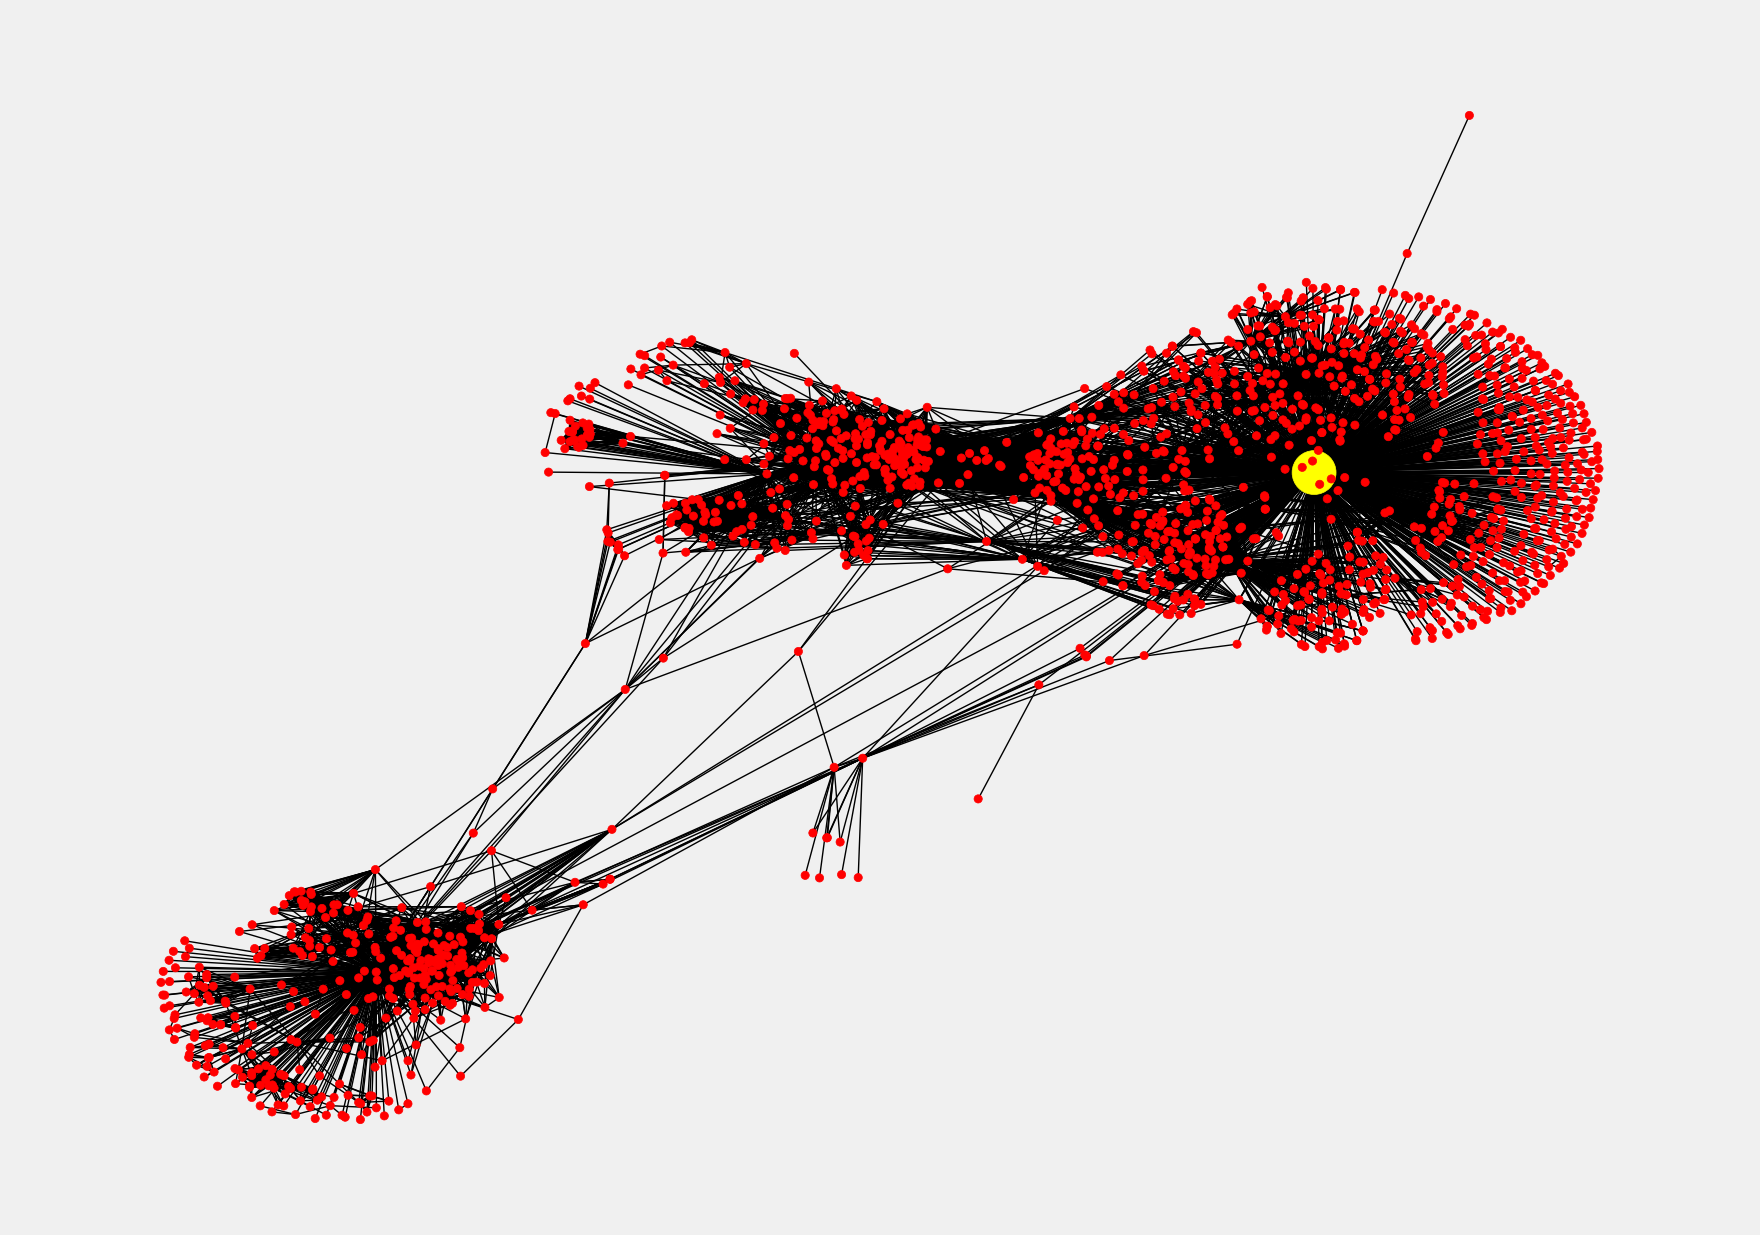

In [14]:
# subgraph for the most influentual user
first_degree_connected_nodes = list(fb.neighbors(107))
second_degree_connected_nodes = []

for x in first_degree_connected_nodes:
    second_degree_connected_nodes += list(fb.neighbors(x))

second_degree_connected_nodes.remove(107)

second_degree_connected_nodes = list(set(second_degree_connected_nodes))

subgraph_107 = nx.subgraph(fb,
                           first_degree_connected_nodes+second_degree_connected_nodes)

pos = nx.spring_layout(subgraph_107)

node_color = ['yellow' if v == 107 else 'red' for v in subgraph_107]  

node_size =  [1000 if v == 107 else 35 for v in subgraph_107]

plt.style.use('fivethirtyeight')  
plt.rcParams['figure.figsize'] = (20, 15)  
plt.axis('off')

nx.draw_networkx(subgraph_107, 
                 pos, 
                 with_labels = False, 
                 node_color=node_color,
                 node_size=node_size )  
plt.show()

### [Centrality](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html#current-flow-closeness)

- _Betweenness centrality (BC)_: the users who connect one geography to another are also important. BC measures how often a node appears in the shortest chosen path between two other nodes.

- _Degree centrality (DC)_: the number of connections for a node.

(np.float64(-0.4302961651980877),
 np.float64(0.6178337459266185),
 np.float64(-0.9012852716445924),
 np.float64(1.1806651163101196))

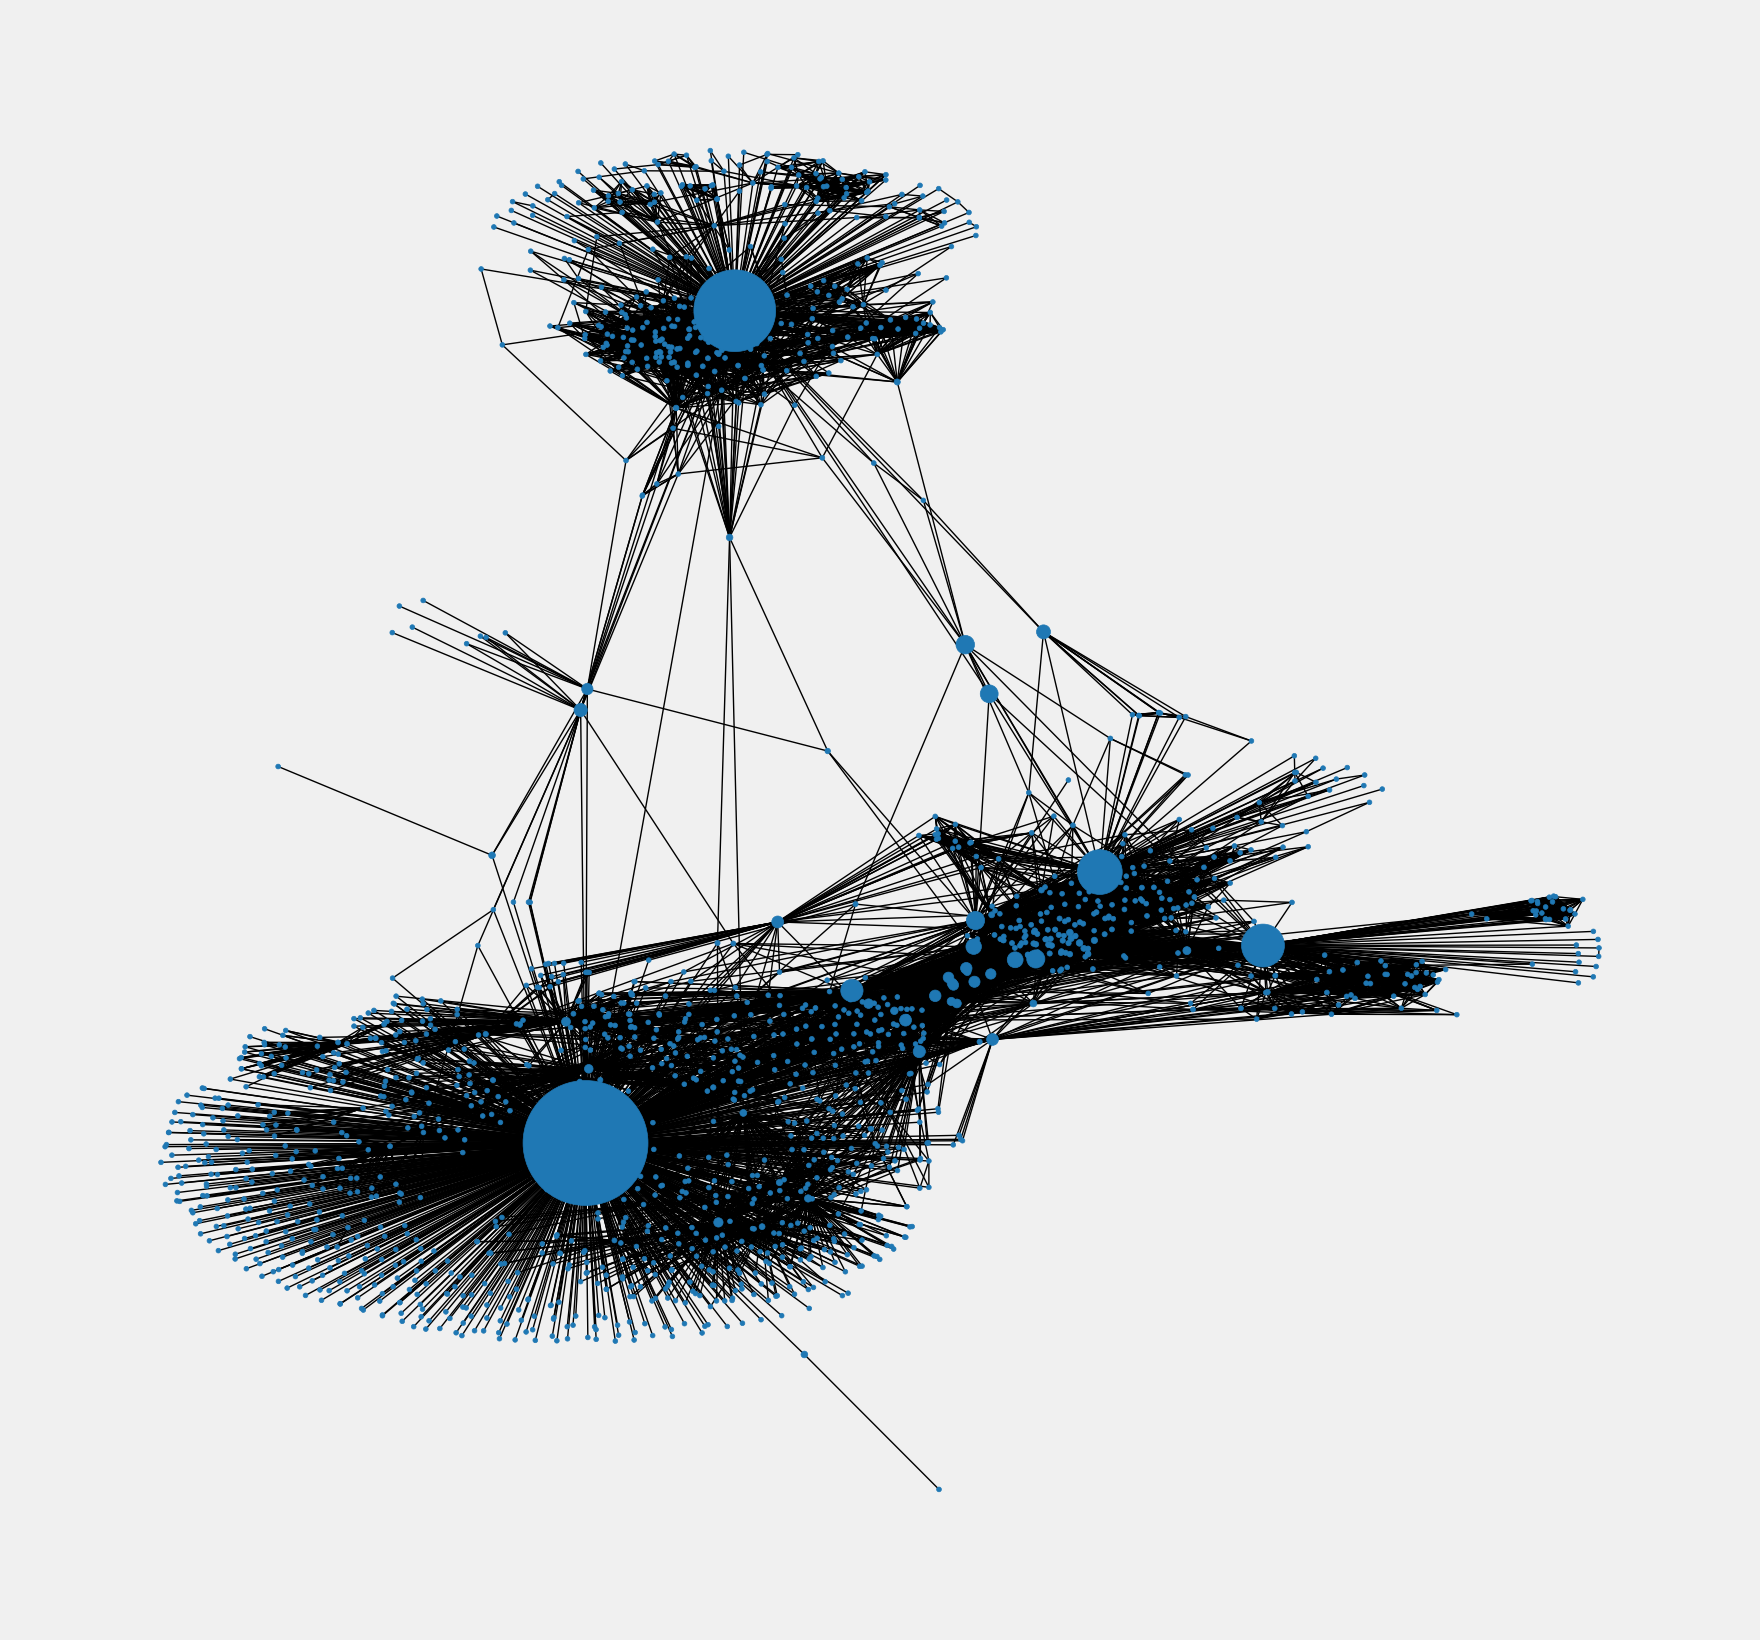

In [15]:
pos = nx.spring_layout(subgraph_107)

bc = nx.betweenness_centrality(subgraph_107,
                               normalized=True, 
                               endpoints=True)

node_size =  [v * 10000 for v in bc.values()]

plt.figure(figsize=(20,20))  

nx.draw_networkx(subgraph_107, 
                 pos=pos, 
                 with_labels=False,  
                 node_size=node_size )  
plt.axis('off')